In [1]:
#Importaciones basicas
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
# graficos incrustados
%matplotlib inline

#Carga de los CSV
BBVA_data = pd.read_csv('train_clientes.csv', header=0)
print("Data Train: ", BBVA_data.shape)

Data Train:  (70000, 53)


In [2]:
if BBVA_data.isnull().any().any():
    BBVA_data = BBVA_data.dropna()
    print("Clean Data Train: ", BBVA_data.shape)

Clean Data Train:  (56262, 53)


In [3]:
entrenar = BBVA_data.drop(['ID_CORRELATIVO', 'ATTRITION'], axis=1)
print("entrenamiento 1: ", entrenar.shape, type(entrenar))
print(entrenar.shape)

entrenamiento 1:  (56262, 51) <class 'pandas.core.frame.DataFrame'>
(56262, 51)


In [4]:
# Separamos las columnas objetivo
columna_artitrion = BBVA_data['ATTRITION']
columna_id = BBVA_data['ID_CORRELATIVO']
# Agregando la columna AGE2
EDAD2 = pd.cut(entrenar['EDAD'], range(0, 150, 10))
entrenar['EDAD'] = EDAD2
entrenar['EDAD'], _ = pd.factorize(entrenar['EDAD'])
#Factorizar los datos categoricos
tipos = entrenar.columns.to_series().groupby(entrenar.dtypes).groups
ctext = tipos[np.dtype('object')]
for c in ctext:
    entrenar[c], _ = pd.factorize(entrenar[c])
print(type(entrenar), entrenar.shape)

<class 'pandas.core.frame.DataFrame'> (56262, 51)


Feature ranking:
1. feature 33 (0.082426)
2. feature 34 (0.068726)
3. feature 6 (0.065991)
4. feature 2 (0.061077)
5. feature 4 (0.056101)
6. feature 35 (0.049544)
7. feature 36 (0.040269)
8. feature 5 (0.032338)
9. feature 44 (0.029118)
10. feature 41 (0.026767)
11. feature 39 (0.024280)
12. feature 19 (0.022384)
13. feature 21 (0.021973)
14. feature 38 (0.021794)
15. feature 37 (0.021688)
16. feature 40 (0.021413)
17. feature 3 (0.019351)
18. feature 27 (0.019046)
19. feature 43 (0.019025)
20. feature 42 (0.017963)
21. feature 15 (0.017008)
22. feature 20 (0.016986)
23. feature 47 (0.016517)
24. feature 7 (0.015765)
25. feature 13 (0.015613)
26. feature 22 (0.015005)
27. feature 28 (0.012963)
28. feature 45 (0.012701)
29. feature 8 (0.010841)
30. feature 23 (0.010090)
31. feature 24 (0.009965)
32. feature 10 (0.009268)
33. feature 9 (0.008906)
34. feature 29 (0.008473)
35. feature 12 (0.008281)
36. feature 25 (0.008198)
37. feature 50 (0.007757)
38. feature 26 (0.007441)
39. feature 

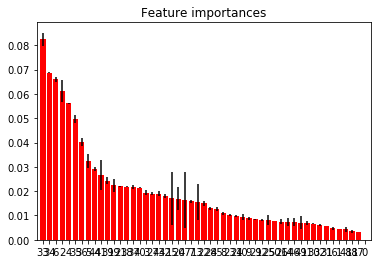

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
X = entrenar
forest = ExtraTreesClassifier(n_estimators=2, random_state=0)
forest.fit(entrenar, columna_artitrion)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [6]:
# Algoritmo de Eliminación Recursiva de atributos con ExtraTrees

print(type(entrenar))
from sklearn.feature_selection import RFE
columnas = list(entrenar.columns.values)
era = RFE(ExtraTreesClassifier(), 20)  # número de atributos a seleccionar
era = era.fit(entrenar, columna_artitrion)
# imprimir resultados
atrib = era.support_
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
print(atributos)

<class 'pandas.core.frame.DataFrame'>
['RANG_INGRESO', 'EDAD', 'ANTIGUEDAD', 'RANG_SDO_PASIVO_MENOS0', 'SDO_ACTIVO_MENOS0', 'SDO_ACTIVO_MENOS1', 'RANG_NRO_PRODUCTOS_MENOS0', 'NRO_ACCES_CANAL1_MENOS0', 'NRO_ACCES_CANAL2_MENOS0', 'NRO_ACCES_CANAL3_MENOS0', 'NRO_ACCES_CANAL3_MENOS1', 'NRO_ACCES_CANAL3_MENOS2', 'NRO_ACCES_CANAL3_MENOS3', 'NRO_ACCES_CANAL3_MENOS4', 'NRO_ACCES_CANAL3_MENOS5', 'NRO_ENTID_SSFF_MENOS0', 'NRO_ENTID_SSFF_MENOS1', 'NRO_ENTID_SSFF_MENOS3', 'NRO_ENTID_SSFF_MENOS4', 'NRO_ENTID_SSFF_MENOS5']


In [11]:
from imblearn.over_sampling import SMOTE
save_entrenar = entrenar 
save_artitrion = columna_artitrion
entrenar, columna_artitrion = SMOTE(kind='borderline2').fit_sample(entrenar, columna_artitrion)
print("entrenamiento SMOTE: ", entrenar.shape)
print(type(entrenar))
print(entrenar)

entrenamiento SMOTE:  (98892, 51)
<class 'numpy.ndarray'>
[[  2.01208000e+05   1.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.01208000e+05   1.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.01208000e+05   1.00000000e+00   2.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  2.01208000e+05   1.00000000e+00   4.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.01208000e+05   1.00000000e+00   1.97484893e+00 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  2.01208000e+05   1.00000000e+00   2.62809323e+00 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]]


In [8]:
print(type(columna_artitrion))
print(columna_artitrion)

<class 'numpy.ndarray'>
[0 0 0 ..., 1 1 1]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(entrenar,columna_artitrion)
#Transformar a la misma escala
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train = sc_X.fit_transform(X_train.astype(float))
X_test = sc_X.transform(X_test.astype(float))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(74168, 51)
(24723, 51)
(74168,)
(24723,)


In [10]:
#Importamos desde sklearn.ensamble, el algoritmo de Random Forest
from sklearn.ensemble import RandomForestClassifier

#Inicializamos el algoritmo Random Forest e indicamos el número de árboles que vamos a construir
classifier=RandomForestClassifier(n_estimators=25)

#Construimos el modelo sobre los datos de entrenamiento
classifier.fit(X_train,y_train)

print("SCORE TRAIN:  ", classifier.score(X_train, y_train))
print("SCORE TEST:  ", classifier.score(X_test, y_test))

SCORE TRAIN:   0.997289936361
SCORE TEST:   0.938276099179


In [12]:
X = save_entrenar.loc[:,atributos].values
X.shape

(56262, 20)

In [14]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, save_artitrion)
from sklearn.preprocessing import StandardScaler
sc_X2 = StandardScaler()
X_train2 = sc_X2.fit_transform(X_train2.astype(float))
X_test2 = sc_X2.transform(X_test2.astype(float))

In [15]:
classifier2=RandomForestClassifier(n_estimators=25)
#Construimos el modelo sobre los datos de entrenamiento
classifier2.fit(X_train2,y_train2)

print("SCORE TRAIN:  ", classifier2.score(X_train2, y_train2))
print("SCORE TEST:  ", classifier2.score(X_test2, y_test2))

SCORE TRAIN:   0.989525073467
SCORE TEST:   0.873027157685


In [16]:
from sklearn import svm
algoritmo = svm.SVC(probability=True)
algoritmo.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
print("SCORE TRAIN:  ", algoritmo.score(X_train, y_train))
print("SCORE TEST:  ", algoritmo.score(X_test, y_test))

SCORE TRAIN:   0.865602416136
SCORE TEST:   0.861141447235


Automatically created module for IPython interactive environment


/home/villacorta/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/home/villacorta/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


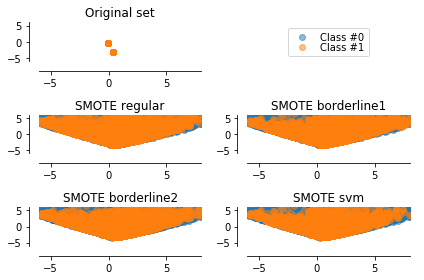

In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
print(__doc__)


def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X_train2)

# Apply regular SMOTE
kind = ['regular', 'borderline1', 'borderline2', 'svm']
X_resampled = []
y_resampled = []
X_res_vis = []
for method in [SMOTE(kind=k) for k in kind]:
    X_res, y_res = method.fit_sample(X_train2, y_train2)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))

# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y_train2, 'Original set')
for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0', 'Class #1'), loc='center',
           ncol=1, labelspacing=0.)
plt.tight_layout()
plt.show()